# load The needed packages

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler



############################ part 2 ######################
########################### visualization related #########################

import seaborn as sns
sns.set(color_codes=True) #adds a good background to our plots

import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline


# Establish a connection with the database Vilicom

In [5]:
import psycopg2
conn = psycopg2.connect(
    host="hostIP/Username",
    port = Theport,
    database="DBname",
    user="username",
    password="password")

NameError: ignored

# Quering the data, Get the table "packet_delay_drop_rate" Joined with "packet_loss_rate"


In [ ]:
import pandas as pd
data = pd.read_sql("""SELECT pddr.id, pddr.starttime, date_trunc('day',pddr.starttime) as day, pddr.ecgi, pddr.cuid,   plr.cuid as plr_cuid, pddr.duid, plr.duid as plr_cellid,  pddr.min5_average_pdcp_sdu_delay_dl, pddr.min5_average_pdcp_sdu_drop_rate_dl,  plr.min5_pdcp_packets_lost_rate_dl, plr.min5_pdcp_packets_lost_rate_ul, plr.min5_volte_downlink_packet_loss_rate, plr.min5_volte_uplink_packet_loss_rate FROM public.packet_delay_drop_rate pddr, public.packet_loss_rate plr where pddr.starttime = plr.starttime and pddr.ecgi = plr.ecgi and pddr.rank[1] = Any('{"R0-RO1","R1-RO0","R1-RO1"}') and pddr.starttime> '2021-10-18' and plr.rank[1] = Any('{"R0-RO1","R1-RO0","R1-RO1"}')""", conn)

NameError: ignored

In [ ]:
data.tail()

,id,starttime,day,ecgi,cuid,plr_cuid,duid,plr_cellid,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
90931,591900,2021-10-18 00:55:00,2021-10-18,2708756710728707 ...,None,None,3 ...,3,NaN,NaN,NaN,0.0,None,None
90932,591928,2021-10-18 01:05:00,2021-10-18,2708756710728707 ...,None,3,3 ...,None,NaN,NaN,0.107359,NaN,None,None
90933,591905,2021-10-18 01:05:00,2021-10-18,2708756710728707 ...,3 ...,3,None,None,32.834236,0.0,0.107359,NaN,None,None
90934,591914,2021-10-18 01:00:00,2021-10-18,2708756710728707 ...,None,None,3 ...,3,NaN,NaN,NaN,0.0,None,None
90935,591893,2021-10-18 01:00:00,2021-10-18,2708756710728707 ...,3 ...,None,None,3,28.115555,0.0,NaN,0.0,None,None


In [ ]:
data.to_csv("./Workshop1")

 # Clean the data from Spaces 
 ### data comes from database is defined as char(256) and this add spaces to the non filled columns
 

In [ ]:
df_obj = data.select_dtypes(['object'])
data[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())


### dealing with null values

In [ ]:
data = data.fillna(0)

In [ ]:
data.tail()

,id,starttime,day,ecgi,cuid,plr_cuid,duid,plr_cellid,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
71375,608873,2021-10-21 12:45:00,2021-10-21,2708756710728707,0,0,3,3,0.0,0.0,0.0,0.0,0,0
71376,608889,2021-10-21 12:50:00,2021-10-21,2708756710728707,0,0,3,3,0.0,0.0,0.0,0.0,0,0
71377,608865,2021-10-21 12:50:00,2021-10-21,2708756710728707,3,0,0,3,0.0,0.0,0.0,0.0,0,0
71378,608881,2021-10-21 12:55:00,2021-10-21,2708756710728707,3,0,0,3,0.0,0.0,0.0,0.0,0,0
71379,608905,2021-10-21 12:55:00,2021-10-21,2708756710728707,0,0,3,3,0.0,0.0,0.0,0.0,0,0


### first look at the data (without any processing) "for all cells together"

In [6]:

data.min5_pdcp_packets_lost_rate_dl.plot(figsize=(8,4))
plt.show()

NameError: ignored

In [7]:
data.min5_average_pdcp_sdu_delay_dl.plot(figsize=(8,4))
plt.show()

NameError: ignored

In [ ]:
from matplotlib import pyplot
pyplot.scatter(data['min5_pdcp_packets_lost_rate_dl'], data['min5_average_pdcp_sdu_delay_dl'])
pyplot.show()

In [ ]:

data2=data[data.columns]
data2

# visualizing data to see the relationship in regards to the day info.
### good for daily analysis

sns.relplot(x='min5_pdcp_packets_lost_rate_dl', 
            y='min5_average_pdcp_sdu_drop_rate_dl', 
            col='ecgi',
            row='day',
            height=2.5,
            data=data2);

sns.relplot(x='min5_pdcp_packets_lost_rate_dl', 
            y='min5_average_pdcp_sdu_drop_rate_dl', 
            col='ecgi',
            hue='min5_volte_downlink_packet_loss_rate', 
            row='day',
            height=2.5,
            data=data);


## ploting distribution per ecgi (cell)
#### using  jitter argument 

In [ ]:

scaler = MinMaxScaler()

data2[['min5_pdcp_packets_lost_rate_dl', 'min5_average_pdcp_sdu_delay_dl']] = scaler.fit_transform(data[['min5_pdcp_packets_lost_rate_dl', 'min5_average_pdcp_sdu_delay_dl']])

Withoutscaling vs afterscaling

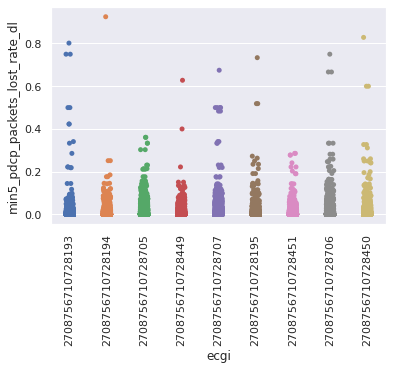

In [ ]:
vis = sns.stripplot(x='ecgi', y='min5_pdcp_packets_lost_rate_dl', data=data,  jitter=True);
vis.tick_params(axis='x', rotation=90)


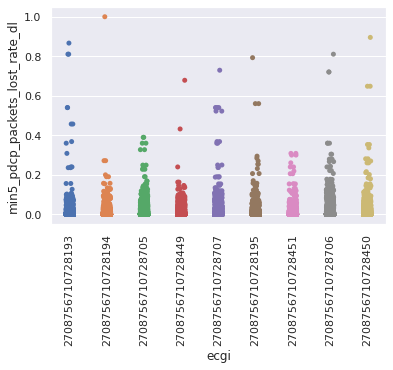

In [ ]:

vis_scal = sns.stripplot(x='ecgi', y='min5_pdcp_packets_lost_rate_dl', data=data2,  jitter=True);
vis_scal.tick_params(axis='x', rotation=90)

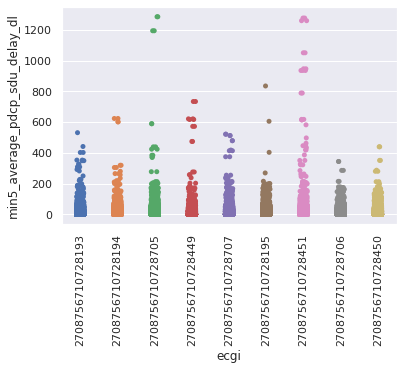

In [ ]:
vis = sns.stripplot(x='ecgi', y='min5_average_pdcp_sdu_delay_dl', data=data, jitter=True);
vis.tick_params(axis='x', rotation=90)

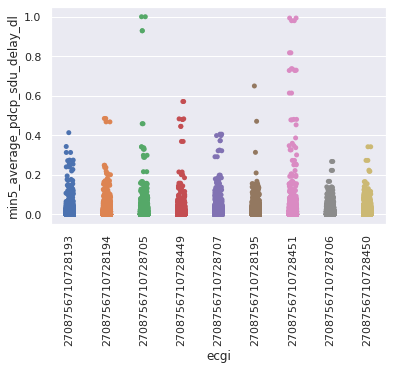

In [ ]:
vis = sns.stripplot(x='ecgi', y='min5_average_pdcp_sdu_delay_dl', data=data2, jitter=True);
vis.tick_params(axis='x', rotation=90)

plt.figure(figsize=(12,6))
sns.boxplot(data=data2);
sns.stripplot(data=data2, color='lightgrey');

vis = sns.swarmplot(x='ecgi', y='min5_average_pdcp_sdu_delay_dl', data=data2);
vis.tick_params(axis='x', rotation=90)

# Discovering Relationships between the two values

### statring with spearman and pearson (Regardless of the linearity)
Hint
##### Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.

In [2]:

# calculate the spearmans's correlation between two variables
import numpy
from scipy.stats import spearmanr,pearsonr


# calculate spearman's correlation


pcorr, _ = pearsonr(data['min5_pdcp_packets_lost_rate_dl'], data['min5_average_pdcp_sdu_delay_dl'])
print('Pearsons correlation: %.3f' % pcorr)


pcorr, _ = spearmanr(data['min5_pdcp_packets_lost_rate_dl'], data['min5_average_pdcp_sdu_delay_dl'])
print('spearman correlation: %.3f' % pcorr)


NameError: ignored

# check statunaty status of the two time series
### as they all have a similar distribution.

In [ ]:
ecgi_test =  data2['ecgi']== '2708756710728193'
data_f = data2[ecgi_test]

In [ ]:
data_f

,id,starttime,day,ecgi,cuid,plr_cuid,duid,plr_cellid,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
4,633950,2021-10-27 00:55:00,2021-10-27,2708756710728193,1,1,0,0,0.000000,0.0,0.000000,0.000000,0,0
6,621320,2021-10-24 05:35:00,2021-10-24,2708756710728193,1,1,0,0,0.009336,0.0,0.000000,0.067051,0,0
7,602372,2021-10-20 04:20:00,2021-10-20,2708756710728193,1,0,0,1,0.000000,0.0,0.000000,0.000000,0,0
24,637337,2021-10-28 07:20:00,2021-10-28,2708756710728193,0,1,1,0,0.000000,0.0,0.000000,0.000000,0,0
25,637314,2021-10-28 07:20:00,2021-10-28,2708756710728193,1,1,0,0,0.000000,0.0,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71096,617045,2021-10-23 08:15:00,2021-10-23,2708756710728193,0,0,1,1,0.000000,0.0,0.000000,0.001441,0,0
71097,617029,2021-10-23 08:15:00,2021-10-23,2708756710728193,1,0,0,1,0.011333,0.0,0.000000,0.001441,0,0
71098,617117,2021-10-23 08:45:00,2021-10-23,2708756710728193,1,1,0,0,0.012004,0.0,0.001299,0.002754,0,0
71105,617035,2021-10-23 08:10:00,2021-10-23,2708756710728193,0,1,1,0,0.000000,0.0,0.004306,0.000000,0,0


##### before normalization

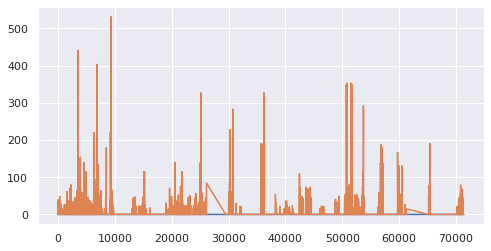

In [ ]:
%matplotlib inline
data[ecgi_test].min5_pdcp_packets_lost_rate_dl.plot(figsize=(8,4))
data[ecgi_test].min5_average_pdcp_sdu_delay_dl.plot(figsize=(8,4))
plt.show()

### all next tests are done when the data is normalized

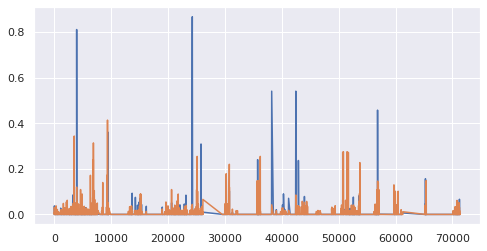

In [ ]:
%matplotlib inline
data_f.min5_pdcp_packets_lost_rate_dl.plot(figsize=(8,4))
data_f.min5_average_pdcp_sdu_delay_dl.plot(figsize=(8,4))
plt.show()

#### Testing the stationary for both 

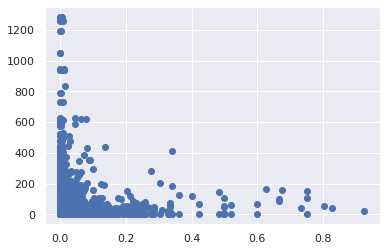

In [ ]:
pyplot.scatter(data['min5_pdcp_packets_lost_rate_dl'], data['min5_average_pdcp_sdu_delay_dl'])
pyplot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf_loss = adfuller(data_f.min5_pdcp_packets_lost_rate_dl)
adf_delay = adfuller(data_f.min5_average_pdcp_sdu_delay_dl)
print("The p-Value for ADF test on the loss rate is: ", adf_loss[1])
print("The p-Value for ADF test on the delay rate is: ", adf_delay[1])

The p-Value for ADF test on the loss rate is:  0.0
The p-Value for ADF test on the delay rate is:  3.0882251130967795e-17


##### as shown the p-values exceed the 0.05 significance level, So can say that the data "TS" is stationary

# testing cointegration (out of curiosity)

In [ ]:
from statsmodels.tsa.stattools import coint
coint(data_f['min5_average_pdcp_sdu_delay_dl'], data_f['min5_pdcp_packets_lost_rate_dl'])


(-9.938531989824162,
 3.546789829493986e-16,
 array([-3.89814221, -3.33707938, -3.04510894]))

In [ ]:
from scipy.stats import linregress
line_cor = linregress(data_f['min5_average_pdcp_sdu_delay_dl'], data_f['min5_pdcp_packets_lost_rate_dl'])
print (line_cor)

LinregressResult(slope=0.23347843128285256, intercept=0.0015462535050922376, rvalue=0.1733689374418213, pvalue=1.2767686661558081e-44, stderr=0.016532579334427578, intercept_stderr=0.0003190142530767557)


### Since the p-value of 1.27e-44 is less than 0.05, we can reject the null hypothesis that the relationship between the min5_average_pdcp_sdu_delay_dl and min5_pdcp_packets_lost_rate_dl is not significant.

In [ ]:

pcorr, _ = pearsonr(data_f['min5_pdcp_packets_lost_rate_dl'], data_f['min5_average_pdcp_sdu_delay_dl'])
print('Pearsons correlation: %.3f' % pcorr)


Pearsons correlation: 0.173


In [ ]:
corr, _ = spearmanr( data_f['min5_average_pdcp_sdu_delay_dl'], data_f['min5_pdcp_packets_lost_rate_dl'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.519


## Checking the cointegration between both time series using the spread (Manually)

In [ ]:
adf_spread = adfuller(data_f.min5_average_pdcp_sdu_delay_dl - data_f.min5_pdcp_packets_lost_rate_dl)
print("The p-Value for ADF test on the spread function: ", adf_spread[1])

The p-Value for ADF test on the spread function:  0.0


another check

In [ ]:
import statsmodels.api as sm
model = sm.OLS(data_f.min5_average_pdcp_sdu_delay_dl.iloc[:90], data_f.min5_pdcp_packets_lost_rate_dl.iloc[:90])
model = model.fit() 
print(model.params[0])

11.471241931170233


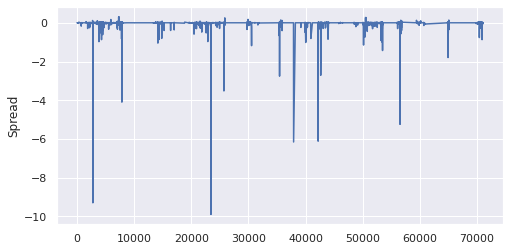

In [ ]:

#Spread
data_f['spread'] = data_f['min5_average_pdcp_sdu_delay_dl'] - model.params[0] * data_f['min5_pdcp_packets_lost_rate_dl']
# Plot the spread
data_f.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(data_f.spread)
adf[0]


0.0

## Conclusion: Since -60. < -3.44, Portfolio is Stationarity and X & Y is cointegrated with more than 99% certainty

In [ ]:
adf[1]

0.0

# Visualizing correlation 

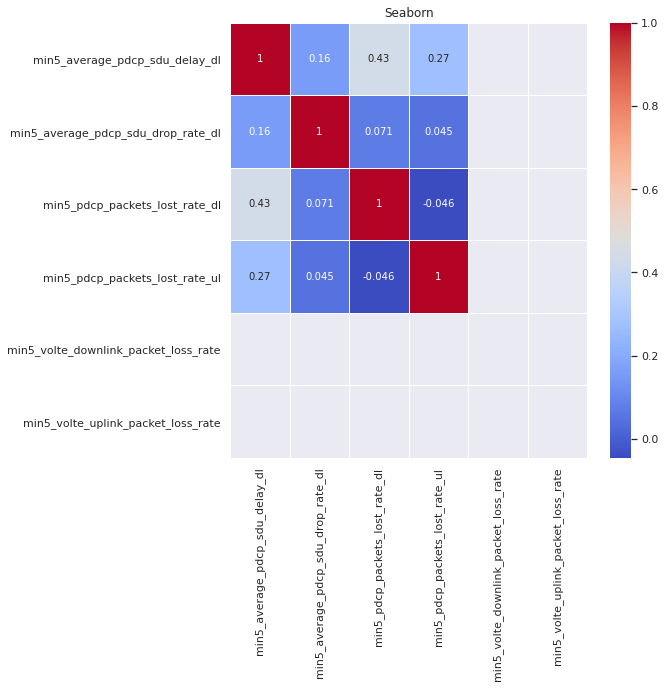

In [ ]:
data_heatmap = data.copy()
data_heatmap.drop(['starttime','id'], axis=1, inplace=True)

# drop year

plt.figure(figsize=(8,8))
sns.heatmap(data_heatmap.corr('spearman'), annot=True, cmap='coolwarm', linewidths=0.5).set_title('Seaborn');

# In this part, we are working on the data to build the base of Anomaly Detection and set it ready for the our next investigation phase.

## THis part is not completed !

#### Calculating Central Tendencies

In [1]:
mean=data['min5_average_pdcp_sdu_delay_dl'].mean();
median=data['min5_average_pdcp_sdu_delay_dl'].median();
mode=data['min5_average_pdcp_sdu_delay_dl'].mode();
fig, ax = plt.subplots(figsize=(10,6)); # — — — — — — — — -Setting size of the canvas
sns.distplot(data['min5_average_pdcp_sdu_delay_dl']);
plt.title('Distribution plot if Plas variable');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
# plt.axvline(mode[0],color=’red’,label=’Mode1')
# plt.axvline(mode[1],color=’red’,label=’Mode2')
plt.legend();

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns



sns.displot(data=data, x='min5_effective_dl_cell_throughput', hue='cuid', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=7, aspect=2)

In [ ]:
sns.displot(data=data, x="min5_effective_dl_cell_throughput", hue="cuid", kind="kde", multiple="stack")

In [ ]:
sns.displot(data=data, x="min5_effective_dl_cell_throughput", y="min5_effective_ul_cell_throughput", hue="cuid", kind="kde")

In [ ]:
data = pd.DataFrame(data.loc[(data['rank'] == 1)])

In [ ]:
data

In [ ]:
x - pd.to_timedelta(5, unit='m')    

In [ ]:
custom_rating(datetime.datetime(2021, 7, 11),'2708756710728193', 5)

In [ ]:
def custom_rating(time, ecgi, duration):
    #print(time, ecgi, duration)
    df = pd.DataFrame(data.loc[(data['starttime'] == time - pd.to_timedelta(duration, unit='m')) & (data['rank'] == 1) & (data['ecgi'] == ecgi)]['min5_effective_dl_cell_throughput']
)
    if df.empty:
        return None
    else:
        return df.iloc[0]['min5_effective_dl_cell_throughput']
        
data['min5_effective_dl_cell_throughput_l5'] = data.apply(lambda x: custom_rating(x['starttime'],x['ecgi'], 5),axis=1)